In [23]:
import pandas as pd
import numpy as np

import itertools

import os
# import matplotlib

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from joblib import load

In [24]:
# fig.set_size_inches(w=4.7747, h=3.5)
# 5.10686

In [25]:
DATASET = 'unexp_but_i_fix'
PATH = '../results/' + DATASET + '/'
# PATH = '../results/100k/gs_beta1/'
# PATH = '../results/100k/4nov_3unexp_3rel/grid_search/'

In [26]:
models = [
    load(PATH + 'KNNpopularity.joblib'),
    load(PATH + 'MatrixFactorization.joblib'),
    load(PATH + 'AutoRec.joblib'),
    load(PATH + 'ease.joblib')
]

In [27]:
scale = True

In [28]:
# serendipity = [list(model.keys()) for model in models]
# recall_ = [i[1] for model in models for k, i in model.items()]
# recall = []
# coverage_ = [i[2] for model in models for k, i in model.items()]
# coverage = []
# start = 0
# for model in models:
#     l = len(model.keys())
#     recall.append(recall_[start:start + l])
#     coverage.append(coverage_[start:start + l])
#     start += l

# recall = np.array(recall)
# coverage = np.array(coverage)

In [29]:
# k_list = np.array([i[0]['K'] for i in models[0].values()])
k_list = np.array([5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 300, 500, 700, 1000])
# k_argsort = np.argsort(k_list)
# k_sorted = k_list[k_argsort]

In [30]:
### KNN
knn_recall_ = []
knn_coverage_ = []
knn_nov_ = []
knn_unexp_ = []
knn_rel_ = []

for i in models[0]:
    if i[0]['k'] not in k_list:
        continue
    knn_recall_.append(i[1])
    knn_coverage_.append(i[2])
    knn_nov_.append(np.mean(i[3]))
    knn_unexp_.append(np.mean(i[4]))
    knn_rel_.append(np.mean(i[5]))

knn_recall = np.array(knn_recall_)
knn_coverage = np.array(knn_coverage_)
knn_nov = np.array(knn_nov_)
knn_unexp = np.array(knn_unexp_)
knn_rel = np.array(knn_rel_)

if scale:
    knn_nov = (knn_nov - knn_nov.min()) / (knn_nov.max() - knn_nov.min())
    knn_unexp = (knn_unexp - knn_unexp.min()) / (knn_unexp.max() - knn_unexp.min())
    knn_rel = (knn_rel - knn_rel.min()) / (knn_rel.max() - knn_rel.min())

In [31]:
### Matrix factorization
mf_recall = []
mf_coverage = []
mf_nov = []
mf_unexp = []
mf_rel = []

for i in models[1]:
    mf_recall.append(i[1])
    mf_coverage.append(i[2])
    mf_nov.append(np.mean(i[3]))
    mf_unexp.append(np.mean(i[4]))
    mf_rel.append(np.mean(i[5]))
    
mf_nov = np.array(mf_nov)
mf_unexp = np.array(mf_unexp)
mf_rel = np.array(mf_rel)

if scale:
    mf_nov = (mf_nov - mf_nov.min()) / (mf_nov.max() - mf_nov.min())
    mf_unexp = (mf_unexp - mf_unexp.min()) / (mf_unexp.max() - mf_unexp.min())
    mf_rel = (mf_rel - mf_rel.min()) / (mf_rel.max() - mf_rel.min())

In [32]:
### AutoRec
autorec_recall = []
autorec_coverage = []
autorec_nov = []
autorec_unexp = []
autorec_rel = []

for i in range(0, len(models[2]) - 1, 3):
    autorec_recall.append(np.mean(np.array(models[2][i:i+3])[:, 1]))
    autorec_coverage.append(np.mean(np.array(models[2][i:i+3])[:, 2]))
    autorec_nov.append(np.vstack(np.array(models[2][i:i+3])[:, 3]).mean())
    autorec_unexp.append(np.vstack(np.array(models[2][i:i+3])[:, 4]).mean())
    autorec_rel.append(np.vstack(np.array(models[2][i:i+3])[:, 5]).mean())

autorec_nov = np.array(autorec_nov)
autorec_unexp = np.array(autorec_unexp)
autorec_rel = np.array(autorec_rel)

if scale:
    autorec_nov = (autorec_nov - autorec_nov.min()) / (autorec_nov.max() - autorec_nov.min())
    autorec_unexp = (autorec_unexp - autorec_unexp.min()) / (autorec_unexp.max() - autorec_unexp.min())
    autorec_rel = (autorec_rel - autorec_rel.min()) / (autorec_rel.max() - autorec_rel.min())

In [33]:
### EASE
ease_recall = []
ease_coverage = []
ease_nov = []
ease_unexp = []
ease_rel = []

for i in models[3]:
    ease_recall.append(i[1])
    ease_coverage.append(i[2])
    ease_nov.append(np.mean(i[3]))
    ease_unexp.append(np.mean(i[4]))
    ease_rel.append(np.mean(i[5]))

ease_nov = np.array(ease_nov)
ease_unexp = np.array(ease_unexp)
ease_rel = np.array(ease_rel)

if scale:
    ease_nov = (ease_nov - ease_nov.min()) / (ease_nov.max() - ease_nov.min())
    ease_unexp = (ease_unexp - ease_unexp.min()) / (ease_unexp.max() - ease_unexp.min())
    ease_rel = (ease_rel - ease_rel.min()) / (ease_rel.max() - ease_rel.min())

In [34]:
width = 0.3
x = np.arange(1, 6)
components = np.array([5, 10, 20, 50, 100, 200, 500, 1000, 2000])
layers = [8, 16, 64, 128, 192, 256, 384, 512, 768, 1024, 1536, 2048]
ease_lambdas = [1.0, 10.0, 50.0, 100.0, 250.0, 500.0, 750.0, 1000.0, 2000.0, 5000.0, 10000.0]

In [35]:
recalls = list(itertools.chain(knn_recall, mf_recall, autorec_recall, ease_recall))
coverages = list(itertools.chain(knn_coverage, mf_coverage, autorec_coverage, ease_coverage))
novs = list(itertools.chain(knn_nov, mf_nov, autorec_nov, ease_nov))
unexps = list(itertools.chain(knn_unexp, mf_unexp, autorec_unexp, ease_unexp))
rels = list(itertools.chain(knn_rel, mf_rel, autorec_rel, ease_rel))

min_recall, max_recall = np.min(recalls), np.max(recalls)
min_coverage, max_coverage = np.min(coverages), np.max(coverages)
min_nov, max_nov = np.min(novs), np.max(novs)
min_unexp, max_unexp = np.min(unexps), np.max(unexps)
min_rel, max_rel = np.min(rels), np.max(rels)

In [36]:
knn_ser = (knn_nov + knn_unexp + knn_rel) / 3
mf_ser = (mf_nov + mf_unexp + mf_rel) / 3
autorec_ser = (autorec_nov + autorec_unexp + autorec_rel) / 3
ease_ser = (ease_nov + ease_unexp + ease_rel) / 3

In [37]:
sers = list(itertools.chain(knn_ser, mf_ser, autorec_ser, ease_ser))
min_ser, max_ser = np.min(sers), np.max(sers)

In [38]:
ser_label = ''
dataset_name = '1m'
img_folder = 'img/'
img_ext = '.png'
path_postfix = '' if scale is False else '_scaled'
if not os.path.exists(PATH + img_folder):
    os.mkdir(PATH + img_folder)

In [39]:
def triple_plot_customization(ax, title, xlabel, ylabel, legend=None, xticks=None, lim_min=None, lim_max=None):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(linewidth=0.5)
    if legend is None:
        ax.legend()
    else:
        ax.legend(loc=legend)
    if xticks is not None:
        ax.set_xticklabels(xticks, rotation=45)
        ax.set_xticks(range(len(xticks)))
    if lim_min is not None and lim_max is not None:
        ax.set_ylim(0.99 * lim_min, 1.01 * lim_max)

In [40]:
col2metric = {
    0: (min_nov, max_nov),
    1: (min_unexp, max_unexp),
    2: (min_rel, max_rel),
    3: (min_ser, max_ser),
    4: (min_recall, max_recall),
    5: (min_coverage, max_coverage),
}

# Models overview

c:\users\daniil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
c:\users\daniil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
c:\users\daniil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
c:\users\daniil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


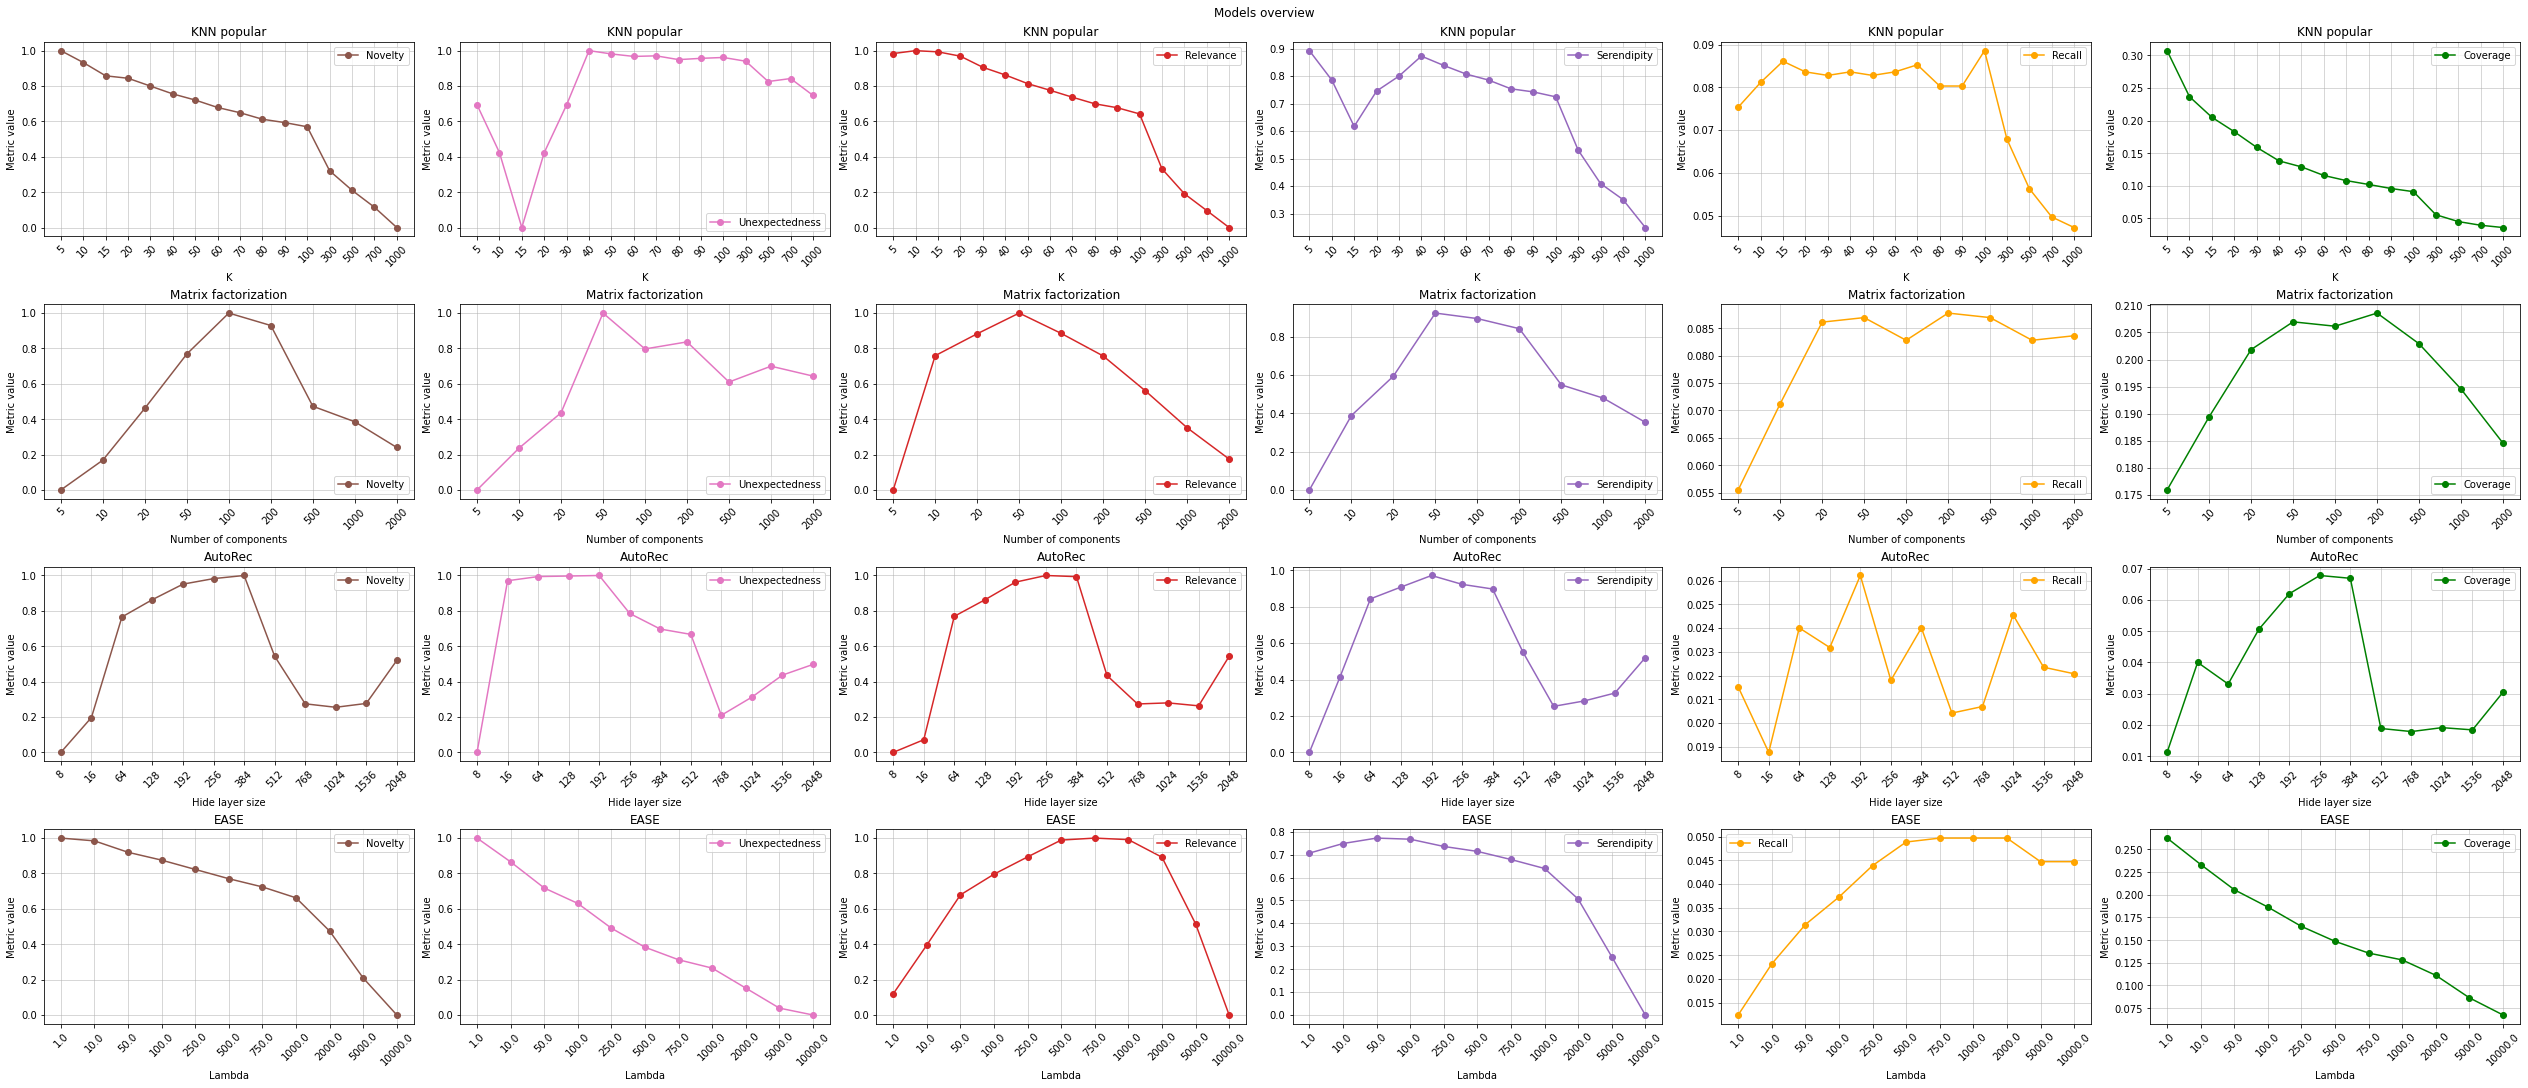

In [41]:
cols = 6
fig, ax = plt.subplots(4, cols, constrained_layout=True, figsize=(35, 15))
fig.suptitle('Models overview')

plt.title('MovieLens-{}'.format(dataset_name))

ax[0, 0].plot(range(len(k_list)), knn_nov, 'o-', label='Novelty', color='C5')
ax[0, 1].plot(range(len(k_list)), knn_unexp, 'o-', label='Unexpectedness', color='C6')
ax[0, 2].plot(range(len(k_list)), knn_rel, 'o-', label='Relevance', color='C3')
ax[0, 3].plot(range(len(k_list)), knn_ser, 'o-', label='Serendipity', color='C4')
ax[0, 4].plot(range(len(k_list)), knn_recall, 'o-', label='Recall', color='orange')
ax[0, 5].plot(range(len(k_list)), knn_coverage, 'o-', label='Coverage', color='green')
for i in range(cols):
    triple_plot_customization(ax[0, i], 'KNN popular', 'K', 'Metric value', xticks=k_list)

ax[1, 0].plot(range(len(components)), mf_nov, 'o-', label='Novelty', color='C5')
ax[1, 1].plot(range(len(components)), mf_unexp, 'o-', label='Unexpectedness', color='C6')
ax[1, 2].plot(range(len(components)), mf_rel, 'o-', label='Relevance', color='C3')
ax[1, 3].plot(range(len(components)), mf_ser, 'o-', label='Serendipity', color='C4')
ax[1, 4].plot(range(len(components)), mf_recall, 'o-', label='Recall', color='orange')
ax[1, 5].plot(range(len(components)), mf_coverage, 'o-', label='Coverage', color='green')
for i in range(cols):
    triple_plot_customization(ax[1, i], 'Matrix factorization', 'Number of components', 'Metric value', legend='lower right', xticks=components)

ax[2, 0].plot(range(len(layers)), autorec_nov, 'o-', label='Novelty', color='C5')
ax[2, 1].plot(range(len(layers)), autorec_unexp, 'o-', label='Unexpectedness', color='C6')
ax[2, 2].plot(range(len(layers)), autorec_rel, 'o-', label='Relevance', color='C3')
ax[2, 3].plot(range(len(layers)), autorec_ser, 'o-', label='Serendipity', color='C4')
ax[2, 4].plot(range(len(layers)), autorec_recall, 'o-', label='Recall', color='orange')
ax[2, 5].plot(range(len(layers)), autorec_coverage, 'o-', label='Coverage', color='green')
for i in range(cols):
    triple_plot_customization(ax[2, i], 'AutoRec', 'Hide layer size', 'Metric value', xticks=layers)

ax[3, 0].plot(range(len(ease_lambdas)), ease_nov, 'o-', label='Novelty', color='C5')
ax[3, 1].plot(range(len(ease_lambdas)), ease_unexp, 'o-', label='Unexpectedness', color='C6')
ax[3, 2].plot(range(len(ease_lambdas)), ease_rel, 'o-', label='Relevance', color='C3')
ax[3, 3].plot(range(len(ease_lambdas)), ease_ser, 'o-', label='Serendipity', color='C4')
ax[3, 4].plot(range(len(ease_lambdas)), ease_recall, 'o-', label='Recall', color='orange')
ax[3, 5].plot(range(len(ease_lambdas)), ease_coverage, 'o-', label='Coverage', color='green')
for i in range(cols):
    triple_plot_customization(ax[3, i], 'EASE', 'Lambda', 'Metric value', xticks=ease_lambdas)

plt.savefig(PATH + img_folder + '3models' + path_postfix + img_ext);

# Models overview (absolute)

c:\users\daniil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
c:\users\daniil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
c:\users\daniil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
c:\users\daniil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


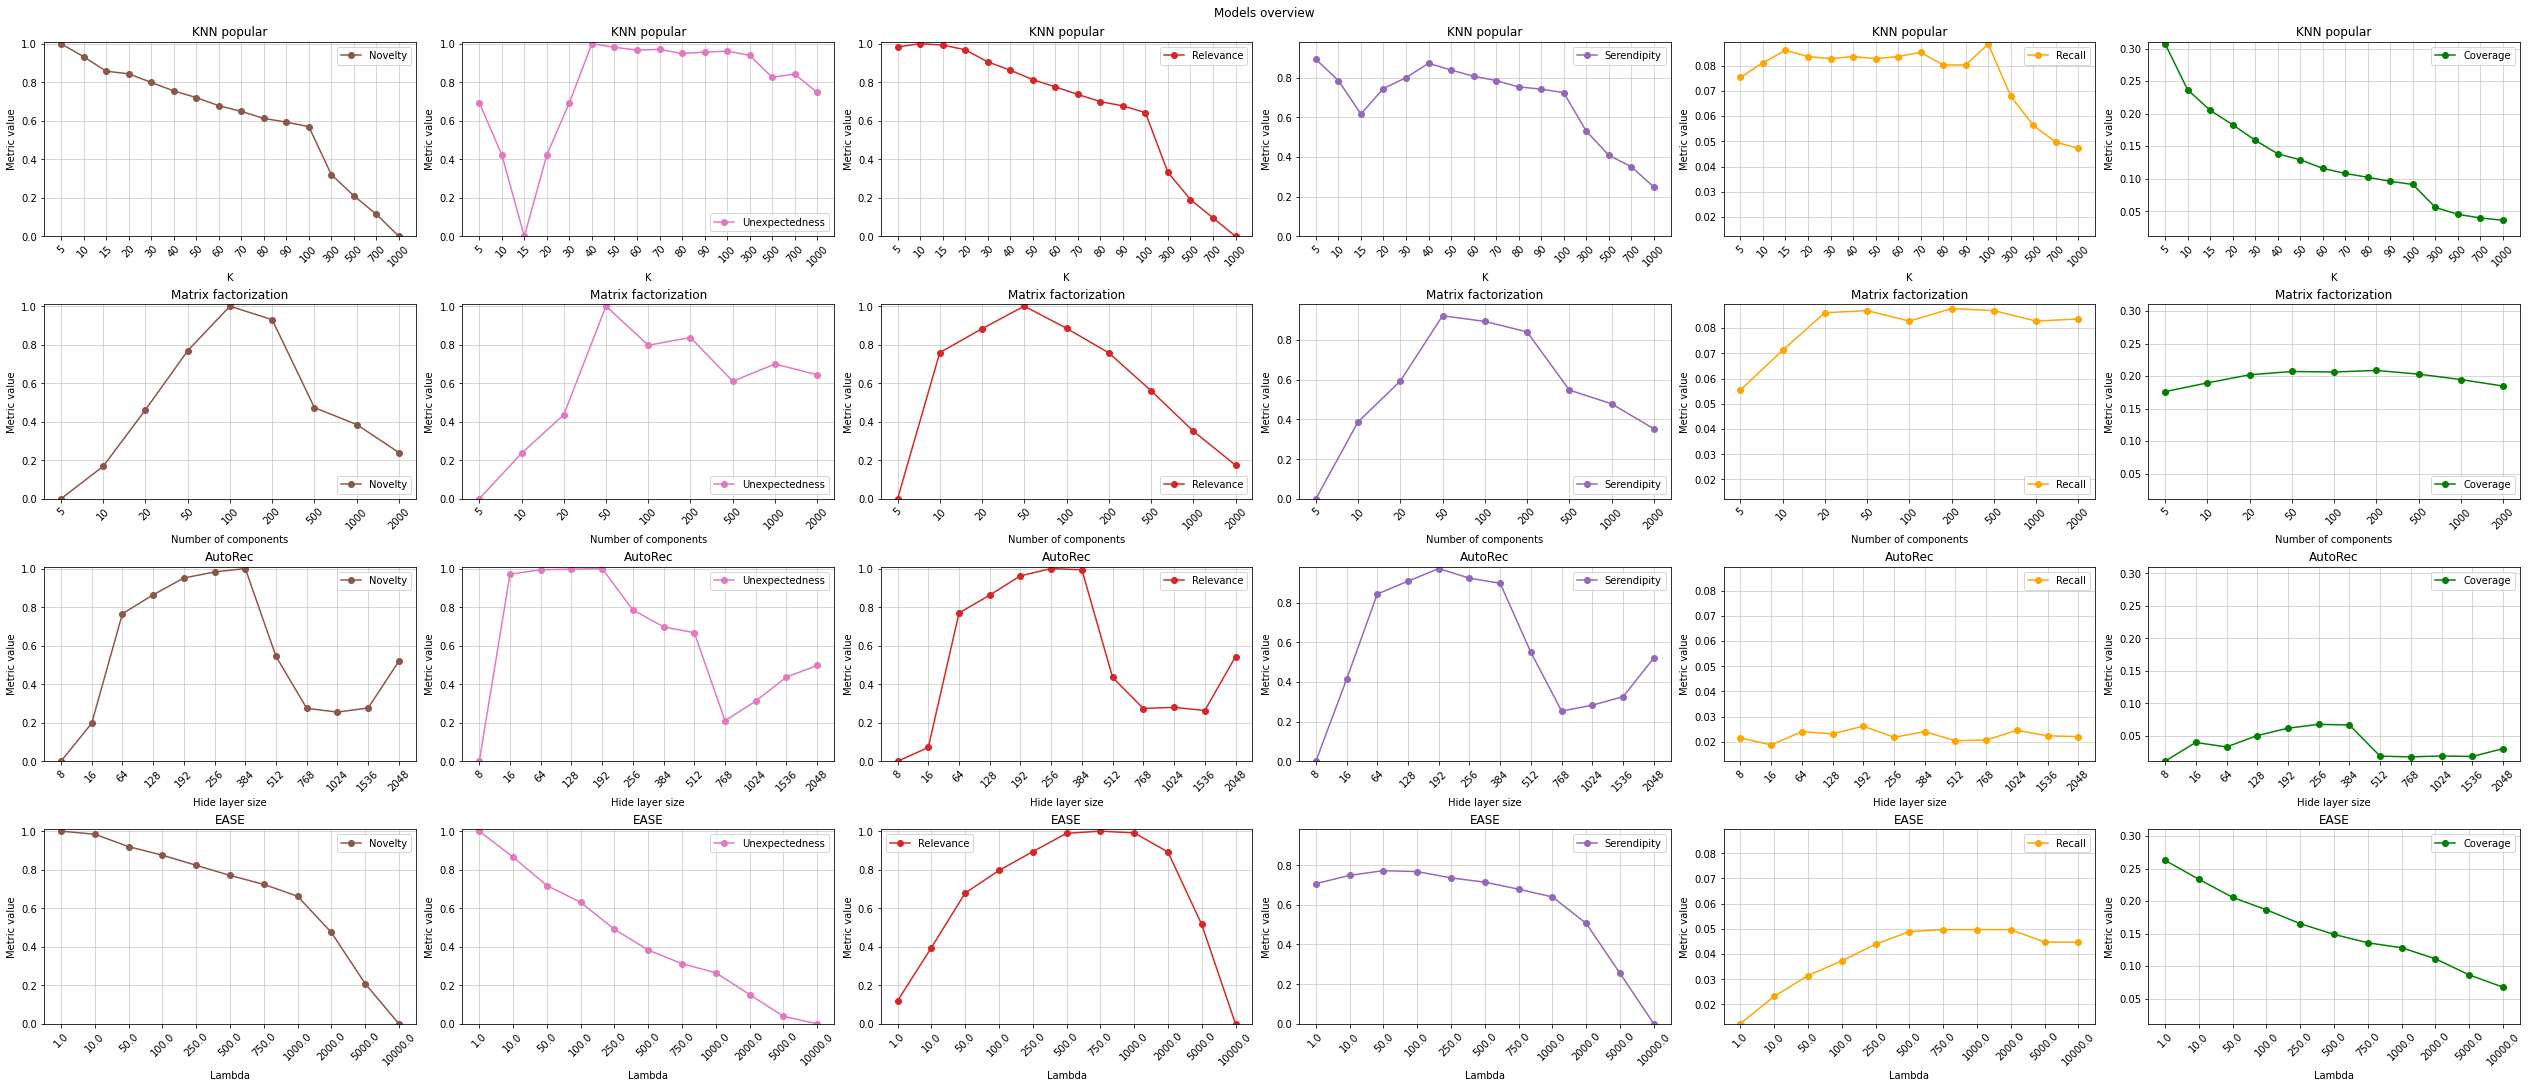

In [42]:
cols = 6
fig, ax = plt.subplots(4, cols, constrained_layout=True, figsize=(35, 15))
fig.suptitle('Models overview')

plt.title('MovieLens-{}'.format(dataset_name))

ax[0, 0].plot(range(len(k_list)), knn_nov, 'o-', label='Novelty', color='C5')
ax[0, 1].plot(range(len(k_list)), knn_unexp, 'o-', label='Unexpectedness', color='C6')
ax[0, 2].plot(range(len(k_list)), knn_rel, 'o-', label='Relevance', color='C3')
ax[0, 3].plot(range(len(k_list)), knn_ser, 'o-', label='Serendipity', color='C4')
ax[0, 4].plot(range(len(k_list)), knn_recall, 'o-', label='Recall', color='orange')
ax[0, 5].plot(range(len(k_list)), knn_coverage, 'o-', label='Coverage', color='green')
for i in range(cols):
    triple_plot_customization(ax[0, i], 'KNN popular', 'K', 'Metric value', xticks=k_list, lim_min=col2metric[i][0], lim_max=col2metric[i][1])

ax[1, 0].plot(range(len(components)), mf_nov, 'o-', label='Novelty', color='C5')
ax[1, 1].plot(range(len(components)), mf_unexp, 'o-', label='Unexpectedness', color='C6')
ax[1, 2].plot(range(len(components)), mf_rel, 'o-', label='Relevance', color='C3')
ax[1, 3].plot(range(len(components)), mf_ser, 'o-', label='Serendipity', color='C4')
ax[1, 4].plot(range(len(components)), mf_recall, 'o-', label='Recall', color='orange')
ax[1, 5].plot(range(len(components)), mf_coverage, 'o-', label='Coverage', color='green')
for i in range(cols):
    triple_plot_customization(ax[1, i], 'Matrix factorization', 'Number of components', 'Metric value', legend='lower right', xticks=components, lim_min=col2metric[i][0], lim_max=col2metric[i][1])


ax[2, 0].plot(range(len(layers)), autorec_nov, 'o-', label='Novelty', color='C5')
ax[2, 1].plot(range(len(layers)), autorec_unexp, 'o-', label='Unexpectedness', color='C6')
ax[2, 2].plot(range(len(layers)), autorec_rel, 'o-', label='Relevance', color='C3')
ax[2, 3].plot(range(len(layers)), autorec_ser, 'o-', label='Serendipity', color='C4')
ax[2, 4].plot(range(len(layers)), autorec_recall, 'o-', label='Recall', color='orange')
ax[2, 5].plot(range(len(layers)), autorec_coverage, 'o-', label='Coverage', color='green')
for i in range(cols):
    triple_plot_customization(ax[2, i], 'AutoRec', 'Hide layer size', 'Metric value', xticks=layers, lim_min=col2metric[i][0], lim_max=col2metric[i][1])

ax[3, 0].plot(range(len(ease_lambdas)), ease_nov, 'o-', label='Novelty', color='C5')
ax[3, 1].plot(range(len(ease_lambdas)), ease_unexp, 'o-', label='Unexpectedness', color='C6')
ax[3, 2].plot(range(len(ease_lambdas)), ease_rel, 'o-', label='Relevance', color='C3')
ax[3, 3].plot(range(len(ease_lambdas)), (ease_nov + ease_unexp + ease_rel) / 3, 'o-', label='Serendipity', color='C4')
ax[3, 4].plot(range(len(ease_lambdas)), ease_recall, 'o-', label='Recall', color='orange')
ax[3, 5].plot(range(len(ease_lambdas)), ease_coverage, 'o-', label='Coverage', color='green')
for i in range(cols):
    triple_plot_customization(ax[3, i], 'EASE', 'Lambda', 'Metric value', xticks=ease_lambdas, lim_min=col2metric[i][0], lim_max=col2metric[i][1])

plt.savefig(PATH + img_folder + '3models_abs' + path_postfix + img_ext);

# Recall versus serendipity

In [ ]:
font_size = 11

In [ ]:
fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=(16, 12))
fig.suptitle('Recall vs serendipity')

plt.title('Recall versus serendipity (MovieLens-{})'.format(dataset_name))

ax[0, 0].plot(knn_recall, knn_serendipity, 'o-')
tmp = zip(knn_recall, knn_serendipity)
for i, p in enumerate(tmp):
    ax[0, 0].text(p[0], p[1], k_list[i], fontsize=font_size, ha='right',va='bottom')

# ax[0].plot(knn_b0_recall, knn_b0_serendipity, 'o--', label=r'$\beta=0$')
# tmp = zip(knn_b0_recall, knn_b0_serendipity)
# for i, p in enumerate(tmp):
#     ax[0].text(p[0], p[1], k_list[i], fontsize=11, ha='right',va='bottom')

ax[0, 0].set_title('KNN popular')
ax[0, 0].set_xlabel('Recall')
ax[0, 0].set_ylabel(ser_label)
ax[0, 0].grid(linewidth=0.5)

ax[0, 1].plot(mf_recall, mf_serendipity, 'o-')
tmp = zip(mf_recall, mf_serendipity)
for i, p in enumerate(tmp):
    ax[0, 1].text(p[0], p[1], components[i], fontsize=font_size, ha='right',va='bottom')
ax[0, 1].set_title('Matrix factorization')
ax[0, 1].set_xlabel('Recall')
ax[0, 1].set_ylabel(ser_label)
ax[0, 1].grid(linewidth=0.5)

ax[1, 0].plot(autorec_recall, autorec_serendipity, 'o-', label='Serendipity')
tmp = zip(autorec_recall, autorec_serendipity)
for i, p in enumerate(tmp):
    ax[1, 0].text(p[0], p[1], layers[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 0].set_title('AutoRec')
ax[1, 0].set_xlabel('Recall')
ax[1, 0].set_ylabel(ser_label)
ax[1, 0].grid(linewidth=0.5)

ax[1, 1].plot(ease_recall, ease_serendipity, 'o-', label='Serendipity')
tmp = zip(ease_recall, ease_serendipity)
for i, p in enumerate(tmp):
    ax[1, 1].text(p[0], p[1], ease_lambdas[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 1].set_title('EASE')
ax[1, 1].set_xlabel('Recall')
ax[1, 1].set_ylabel(ser_label)
ax[1, 1].grid(linewidth=0.5)

plt.savefig(PATH + img_folder + 'recall_vs_serendipity' + path_postfix + img_ext);

# Recall versus serendipity (absolute)

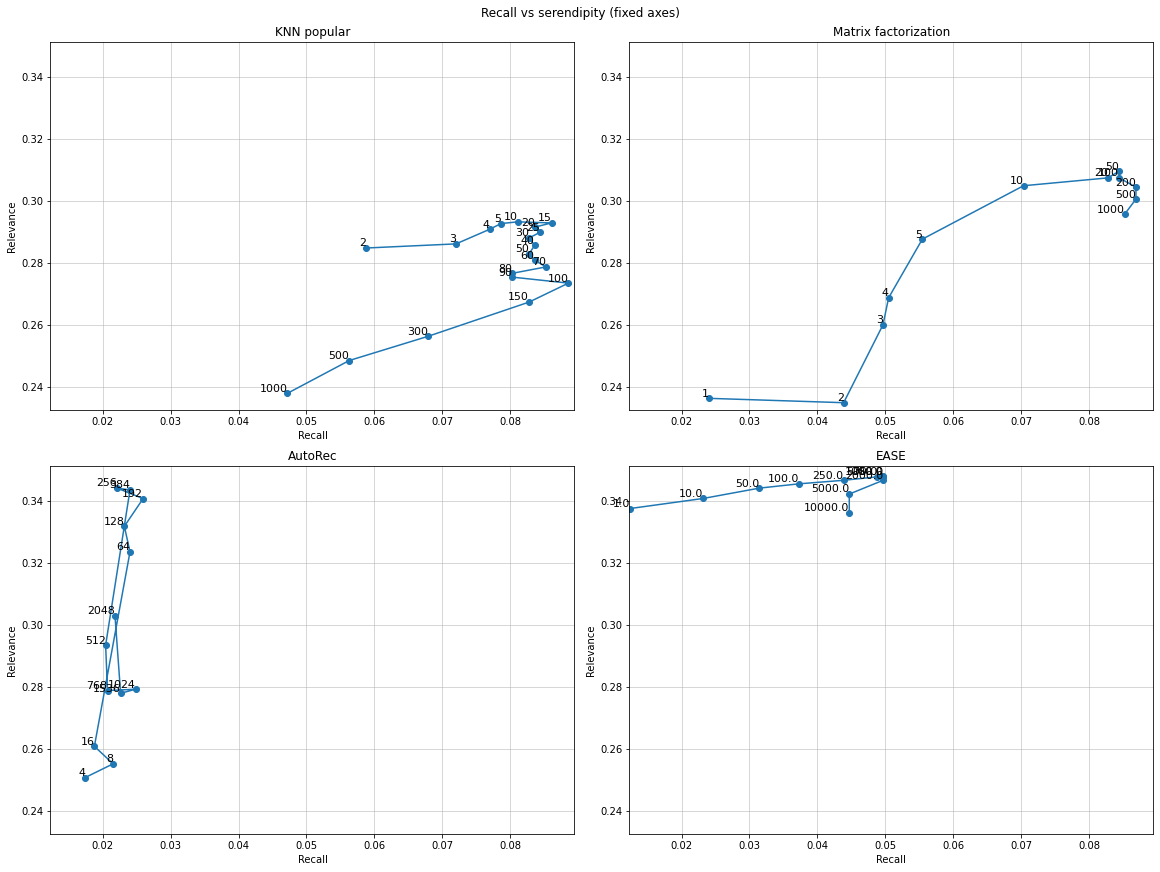

In [121]:
fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=(16, 12))
fig.suptitle('Recall vs serendipity (fixed axes)')

plt.title('Recall versus serendipity (MovieLens-{})'.format(dataset_name))

ax[0, 0].plot(knn_recall, knn_serendipity, 'o-')
tmp = zip(knn_recall, knn_serendipity)
for i, p in enumerate(tmp):
    ax[0, 0].text(p[0], p[1], k_list[i], fontsize=font_size, ha='right',va='bottom')

# ax[0].plot(knn_b0_recall, knn_b0_serendipity, 'o--', label=r'$\beta=0$')
# tmp = zip(knn_b0_recall, knn_b0_serendipity)
# for i, p in enumerate(tmp):
#     ax[0].text(p[0], p[1], k_list[i], fontsize=11, ha='right',va='bottom')

ax[0, 0].set_title('KNN popular')
ax[0, 0].set_xlabel('Recall')
ax[0, 0].set_ylabel(ser_label)
ax[0, 0].set_xlim(0.99 * min_recall, 1.01 * max_recall)
ax[0, 0].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[0, 0].grid(linewidth=0.5)

ax[0, 1].plot(mf_recall, mf_serendipity, 'o-')
tmp = zip(mf_recall, mf_serendipity)
for i, p in enumerate(tmp):
    ax[0, 1].text(p[0], p[1], components[i], fontsize=font_size, ha='right',va='bottom')
ax[0, 1].set_title('Matrix factorization')
ax[0, 1].set_xlabel('Recall')
ax[0, 1].set_ylabel(ser_label)
ax[0, 1].set_xlim(0.99 * min_recall, 1.01 * max_recall)
ax[0, 1].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[0, 1].grid(linewidth=0.5)

ax[1, 0].plot(autorec_recall, autorec_serendipity, 'o-', label='Serendipity')
tmp = zip(autorec_recall, autorec_serendipity)
for i, p in enumerate(tmp):
    ax[1, 0].text(p[0], p[1], layers[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 0].set_title('AutoRec')
ax[1, 0].set_xlabel('Recall')
ax[1, 0].set_ylabel(ser_label)
ax[1, 0].set_xlim(0.99 * min_recall, 1.01 * max_recall)
ax[1, 0].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[1, 0].grid(linewidth=0.5)

ax[1, 1].plot(ease_recall, ease_serendipity, 'o-', label='Serendipity')
tmp = zip(ease_recall, ease_serendipity)
for i, p in enumerate(tmp):
    ax[1, 1].text(p[0], p[1], ease_lambdas[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 1].set_title('EASE')
ax[1, 1].set_xlabel('Recall')
ax[1, 1].set_ylabel(ser_label)
ax[1, 1].set_xlim(0.99 * min_recall, 1.01 * max_recall)
ax[1, 1].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[1, 1].grid(linewidth=0.5)

plt.savefig(PATH + img_folder + 'recall_vs_serendipity_absolute' + path_postfix + img_ext);

# Coverage versus serendipity

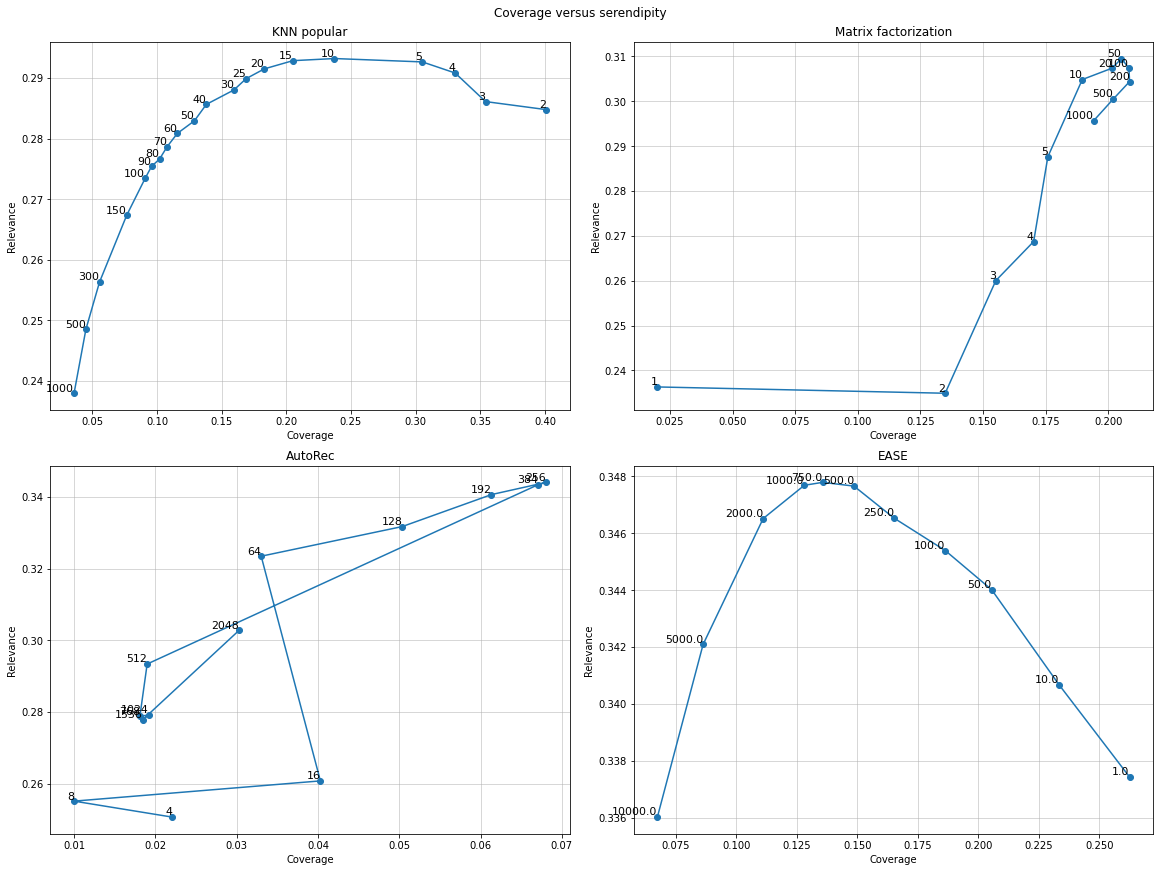

In [122]:
fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=(16, 12))

fig.suptitle('Coverage versus serendipity')

ax[0, 0].plot(knn_coverage, knn_serendipity, 'o-')
tmp = zip(knn_coverage, knn_serendipity)
for i, p in enumerate(tmp):
    ax[0, 0].text(p[0], p[1], k_list[i], fontsize=font_size, ha='right',va='bottom')

# ax[0].plot(knn_b0_coverage, knn_b0_serendipity, 'o--', label=r'$\beta=0$')
# tmp = zip(knn_b0_coverage, knn_b0_serendipity)
# for i, p in enumerate(tmp):
#     ax[0].text(p[0], p[1], k_list[i], fontsize=11, ha='right',va='bottom')
    
ax[0, 0].set_title('KNN popular')
ax[0, 0].set_xlabel('Coverage')
ax[0, 0].set_ylabel(ser_label)
ax[0, 0].grid(linewidth=0.5)


ax[0, 1].plot(mf_coverage, mf_serendipity, 'o-')
tmp = zip(mf_coverage, mf_serendipity)
for i, p in enumerate(tmp):
    ax[0, 1].text(p[0], p[1], components[i], fontsize=font_size, ha='right',va='bottom')
ax[0, 1].set_title('Matrix factorization')
ax[0, 1].set_xlabel('Coverage')
ax[0, 1].set_ylabel(ser_label)
ax[0, 1].grid(linewidth=0.5)

ax[1, 0].plot(autorec_coverage, autorec_serendipity, 'o-', label='Serendipity')
tmp = zip(autorec_coverage, autorec_serendipity)
for i, p in enumerate(tmp):
    ax[1, 0].text(p[0], p[1], layers[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 0].set_title('AutoRec')
ax[1, 0].set_xlabel('Coverage')
ax[1, 0].set_ylabel(ser_label)
ax[1, 0].grid(linewidth=0.5)

ax[1, 1].plot(ease_coverage, ease_serendipity, 'o-', label='Serendipity')
tmp = zip(ease_coverage, ease_serendipity)
for i, p in enumerate(tmp):
    ax[1, 1].text(p[0], p[1], ease_lambdas[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 1].set_title('EASE')
ax[1, 1].set_xlabel('Coverage')
ax[1, 1].set_ylabel(ser_label)
ax[1, 1].grid(linewidth=0.5)

plt.savefig(PATH + img_folder + 'coverage_vs_serendipity' + path_postfix + img_ext);

# Coverage versus serendipity (absolute)

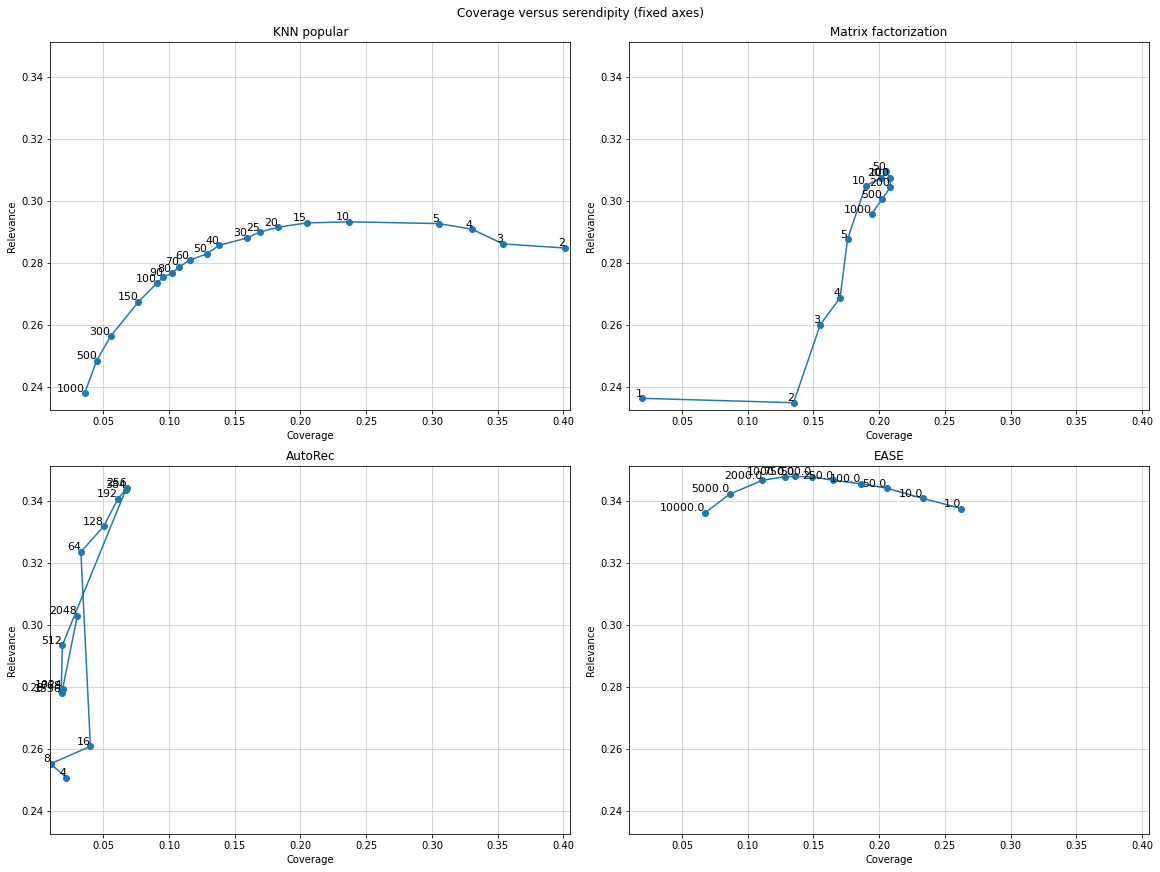

In [123]:
fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=(16, 12))

fig.suptitle('Coverage versus serendipity (fixed axes)')

ax[0, 0].plot(knn_coverage, knn_serendipity, 'o-')
tmp = zip(knn_coverage, knn_serendipity)
for i, p in enumerate(tmp):
    ax[0, 0].text(p[0], p[1], k_list[i], fontsize=font_size, ha='right',va='bottom')

# ax[0].plot(knn_b0_coverage, knn_b0_serendipity, 'o--', label=r'$\beta=0$')
# tmp = zip(knn_b0_coverage, knn_b0_serendipity)
# for i, p in enumerate(tmp):
#     ax[0].text(p[0], p[1], k_list[i], fontsize=11, ha='right',va='bottom')
    
ax[0, 0].set_title('KNN popular')
ax[0, 0].set_xlabel('Coverage')
ax[0, 0].set_ylabel(ser_label)
ax[0, 0].set_xlim(0.99 * min_coverage, 1.01 * max_coverage)
ax[0, 0].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[0, 0].grid(linewidth=0.5)


ax[0, 1].plot(mf_coverage, mf_serendipity, 'o-')
tmp = zip(mf_coverage, mf_serendipity)
for i, p in enumerate(tmp):
    ax[0, 1].text(p[0], p[1], components[i], fontsize=font_size, ha='right',va='bottom')
ax[0, 1].set_title('Matrix factorization')
ax[0, 1].set_xlabel('Coverage')
ax[0, 1].set_ylabel(ser_label)
ax[0, 1].set_xlim(0.99 * min_coverage, 1.01 * max_coverage)
ax[0, 1].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[0, 1].grid(linewidth=0.5)

ax[1, 0].plot(autorec_coverage, autorec_serendipity, 'o-', label='Serendipity')
tmp = zip(autorec_coverage, autorec_serendipity)
for i, p in enumerate(tmp):
    ax[1, 0].text(p[0], p[1], layers[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 0].set_title('AutoRec')
ax[1, 0].set_xlabel('Coverage')
ax[1, 0].set_ylabel(ser_label)
ax[1, 0].set_xlim(0.99 * min_coverage, 1.01 * max_coverage)
ax[1, 0].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[1, 0].grid(linewidth=0.5)

ax[1, 1].plot(ease_coverage, ease_serendipity, 'o-', label='Serendipity')
tmp = zip(ease_coverage, ease_serendipity)
for i, p in enumerate(tmp):
    ax[1, 1].text(p[0], p[1], ease_lambdas[i], fontsize=font_size, ha='right',va='bottom')
ax[1, 1].set_title('EASE')
ax[1, 1].set_xlabel('Coverage')
ax[1, 1].set_ylabel(ser_label)
ax[1, 1].set_xlim(0.99 * min_coverage, 1.01 * max_coverage)
ax[1, 1].set_ylim(0.99 * min_serendipity, 1.01 * max_serendipity)
ax[1, 1].grid(linewidth=0.5)

plt.savefig(PATH + img_folder + 'coverage_vs_serendipity_absolute' + path_postfix + img_ext);

In [ ]:
fig = plt.figure(figsize=(30, 6))
ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.plot(knn_recall, knn_coverage, knn_serendipity, 'o-')
z = zip(knn_recall, knn_coverage, knn_serendipity)
for i, zz in enumerate(z):
    ax.text(zz[0], zz[1], zz[2], k_list[i], fontsize=8, ha='right',va='bottom')
ax.set_xlabel('Recall')
ax.set_ylabel('Coverage')
ax.set_zlabel(ser_label)
ax.title.set_text('KNN popular')

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.plot(mf_recall, mf_coverage, mf_serendipity, 'o-')
z = zip(mf_recall, mf_coverage, mf_serendipity)
for i, zz in enumerate(z):
    ax.text(zz[0], zz[1], zz[2], components[i], fontsize=8, ha='right',va='bottom')
ax.set_xlabel('Recall')
ax.set_ylabel('Coverage')
ax.set_zlabel(ser_label)
ax.title.set_text('Matrix factorization')

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.plot(autorec_recall, autorec_coverage, autorec_serendipity, 'o-')
z = zip(autorec_recall, autorec_coverage, autorec_serendipity)
for i, zz in enumerate(z):
    ax.text(zz[0], zz[1], zz[2], layers[i], fontsize=8, ha='right',va='bottom')
ax.set_xlabel('Recall')
ax.set_ylabel('Coverage')
ax.set_zlabel(ser_label)
ax.title.set_text('AutoRec')

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.plot(ease_recall, ease_coverage, ease_serendipity, 'o-')
z = zip(ease_recall, ease_coverage, ease_serendipity)
for i, zz in enumerate(z):
    ax.text(zz[0], zz[1], zz[2], layers[i], fontsize=8, ha='right',va='bottom')
ax.set_xlabel('Recall')
ax.set_ylabel('Coverage')
ax.set_zlabel(ser_label)
ax.title.set_text('EASE')

plt.savefig(PATH + img_folder + '3d_models' + path_postfix + img_ext);

# plt.show()

## Serendipity and recall correlation

In [ ]:
np.corrcoef(knn_serendipity, knn_recall)

In [ ]:
np.corrcoef(mf_serendipity, mf_recall)

In [ ]:
np.corrcoef(autorec_serendipity, autorec_recall)

## Serendipity and coverage correlation

In [ ]:
np.corrcoef(knn_serendipity, knn_coverage)

In [ ]:
np.corrcoef(mf_serendipity_2, mf_coverage_2)

In [ ]:
np.corrcoef(autorec_serendipity, autorec_coverage)

In [ ]:
models_named = {
    'KNN': models[0],
    'MF': models[1],
    'AutoRec': models[2]
}

helpers = {
    'KNN': 'k=',
    'MF': 'SVD, n\\textunderscore comp=',
    'AutoRec': 'hide\\textunderscore layer='
}

helpers2 = {
    'KNN': 'K',
    'MF': 'n_components',
    'AutoRec': 'hide_layer'
}

In [ ]:
for k, i in models_named.items():
    for kk, ii in i.items():
        serendipity = kk
        params, recall, coverage, time = ii
        print('{} ({}{}) & {:.3f} & {:.3f} & {:.3f} & {:.0f} \\\\'.format(k, helpers[k], params[helpers2[k]], serendipity, recall, coverage, time))

In [ ]:
for kk, ii in knn_beta0.items():
    serendipity = kk
    params, recall, coverage, time = ii
    print(r'KNN, $\beta=0$ (k={}) & {:.3f} & {:.3f} & {:.3f} & {:.0f} \\'.format(params['K'], serendipity, recall, coverage, time))